**Installing Dependencies**

In [ ]:
pip install pinecone langchain pinecone-text langchain_community pypdf langchain-huggingface chromadb rank_bm25

In [ ]:
pip install sentence_transformers huggingface langchain langchain_community pinecone pinecone-client pinecone-notebooks pypdf langchain-huggingface chromadb rank_bm25

In [ ]:
pip install langchain-groq

**Loading HuggingFace Token**

**Loading Sentence Transformer Model for Embeddings**

In [ ]:
from dotenv import load_dotenv
load_dotenv()
from langchain_huggingface import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
embeddings

**Loading Documents using PyPDFLoader**

In [ ]:
from langchain_community.document_loaders import PyPDFLoader
docpath = "/content/drive/MyDrive/VectorSave/cardiology/cardiology-explained.pdf"
loader = PyPDFLoader(docpath)

In [ ]:
docs = loader.load()

**Creating Naive Chunks using Reursive Character Text Splitter.**
**chunk size and overlap are selected based on popular use-cases.**

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
splitter = RecursiveCharacterTextSplitter(chunk_size=800,
                                          chunk_overlap=100)
naive_chunks = splitter.split_documents(docs)

In [ ]:
!pip install langchain-experimental

**Loading the Semantic Chunker from langchain to create semantic chunks based on percentile**



---



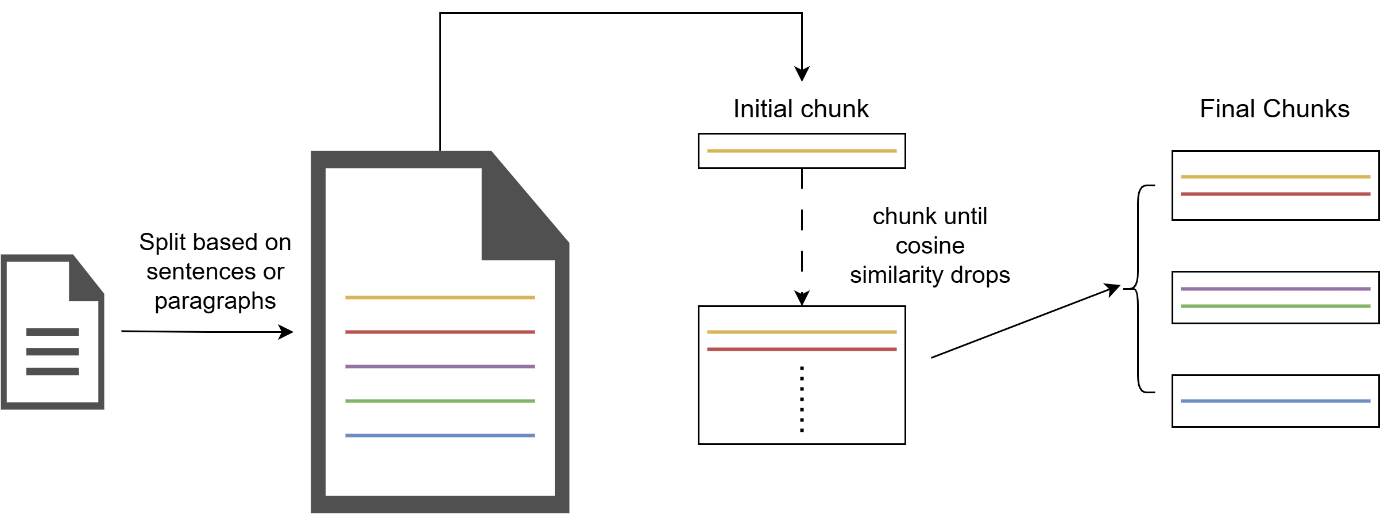

Semantic Chunking splits the text into sentences and creates chunks based on cosine similarity. Sentences keep getting added to the chunk until the cosine similarity of the chunk and the next sentence drops below the threshold. A new chunk is then created and the process repeates until we get the final chunks.

In [ ]:
from langchain_experimental.text_splitter import SemanticChunker

semantic_chunker = SemanticChunker(embeddings, breakpoint_threshold_type="percentile")

Semantic chunks created

In [ ]:
semantic_chunks = semantic_chunker.create_documents([d.page_content for d in docs])

**Lets test to find the word "myglobin" in the semantic chunks and observe the chunk lenght**

In [ ]:
for semantic_chunk in semantic_chunks:
  if "myoglobin" in semantic_chunk.page_content:
    print(semantic_chunk.page_content,"\n")
    print("Length of the page chunk is: ",len(semantic_chunk.page_content))

myocardial fiber disarray  182
myocardial infarction (MI)  46
in acute coronary syndromes  70
acute, definition of  46
anteroseptal  27
ECG  25, 27
thrombosis in  45
myoglobin  68, 69
N
natriuretic peptides  97
neutral endopeptidase inhibitors  106
nicorandil  55
nifedipine  152
nitrates
acute coronary syndromes  69
angina  54
heart failure  98, 105, 106
nitric oxide  52
nitroprusside  91, 150, 157
nonspecific intraventricular conduction defect  122
nuclear cardiology  59–61
O
opiates  69, 108
orthopnea  95
Osler, W  171
Osler’s nodes  6, 167, 168, 170
ostium primum/secundum  205, 207
oxygen therapy  69
P
P waves  19, 22
abnormalities  30
atrial tachycardia  123
pacemaker syndrome  138
pacemakers  135–40
AAI  136
automatic implantable cardioverter defibrillator (AICD)  139–40
avoidance of magnetic fields  139
codes  135–6, 137
complications  138–9
DDD  118, 121, 135–6, 138, 184
DDI  114
ECG  139
first artificial  24
history  137
implantation  137–8
indications, standard  136
mode switc

**Doing the same for naive chunks to observe the difference**

In [ ]:
for chunk in naive_chunks:
  if "myoglobin" in chunk.page_content:
    print(chunk.page_content,"\n")
    print("Length of the page chunk is: ",len(chunk.page_content))

myocardial fiber disarray  182
myocardial infarction (MI)  46
in acute coronary syndromes  70
acute, definition of  46
anteroseptal  27
ECG  25, 27
thrombosis in  45
myoglobin  68, 69
N
natriuretic peptides  97
neutral endopeptidase inhibitors  106
nicorandil  55
nifedipine  152
nitrates
acute coronary syndromes  69
angina  54
heart failure  98, 105, 106
nitric oxide  52
nitroprusside  91, 150, 157
nonspecific intraventricular conduction defect  122
nuclear cardiology  59–61
O
opiates  69, 108
orthopnea  95
Osler, W  171
Osler’s nodes  6, 167, 168, 170
ostium primum/secundum  205, 207
oxygen therapy  69
P
P waves  19, 22
abnormalities  30
atrial tachycardia  123
pacemaker syndrome  138
pacemakers  135–40
AAI  136
automatic implantable cardioverter defibrillator (AICD)  139–40 

Length of the page chunk is:  786


**The difference between chunks is noticed**

The length of semnatic chunk is 1042

The length of naive chunk in 786



---



**Lets test for the term 'agnia pectoris'**

In [ ]:
for semantic_chunk in semantic_chunks:
  if "angina pectoris" in semantic_chunk.page_content:
    print("Page content of chunk is:\n",semantic_chunk.page_content,"\n")
    print("Length of the page chunk is: ",len(semantic_chunk.page_content), "\n")

Page content of chunk is:
 In such cases, it is essential that the history is accurately established and
documented. The most common noncardiac cause is dyspepsia. Although chest
pain following a big meal could have a cardiac, gastroesophageal, or biliary origin,
pain resulting from exercise is rarely biliary. It may be difficult to differentiate
esophageal spasm from cardiac pain as they are both improved by nitrate. Other noncardiac causes to consider are musculoskeletal, pericardial, and pleural. ANGINA PECTORIS
William Heberden defined angina pectoris in 1768 and provided a clear
description of the familiar pain. However, it was Edward Jenner and Caleb
Parry who linked this “disorder of the breast ” with the “hardening” of the
arteries that had been described by Giovanni Morgagni 7 years earlier. Coronary artery disease
47 

Length of the page chunk is:  811 

Page content of chunk is:
 Chapter 8
132
Newly discovered
AF
Paroxysmal Persistent
No therapy needed
unless severe
symptoms

In [ ]:
for chunk in naive_chunks:
  if "angina pectoris" in chunk.page_content:
    print("Page content of chunk is:\n",chunk.page_content,"\n")
    print("Length of the page chunk is: ",len(chunk.page_content), "\n")

Page content of chunk is:
 A common presentation in general practice is chest pain accompanied by an atypical
history. In such cases, it is essential that the history is accurately established and
documented. The most common noncardiac cause is dyspepsia. Although chest
pain following a big meal could have a cardiac, gastroesophageal, or biliary origin,
pain resulting from exercise is rarely biliary. It may be difficult to differentiate
esophageal spasm from cardiac pain as they are both improved by nitrate.
Other noncardiac causes to consider are musculoskeletal, pericardial, and pleural. 
ANGINA PECTORIS
William Heberden defined angina pectoris in 1768 and provided a clear
description of the familiar pain. However, it was Edward Jenner and Caleb 

Length of the page chunk is:  730 

Page content of chunk is:
 Chapter 8
132
Newly discovered
AF
Paroxysmal Persistent
No therapy needed
unless severe
symptoms (eg,
hypotension, HF,
angina pectoris)
Anticoagulation
as needed
Accept
permanen

**Box Plot to compare chunk length**

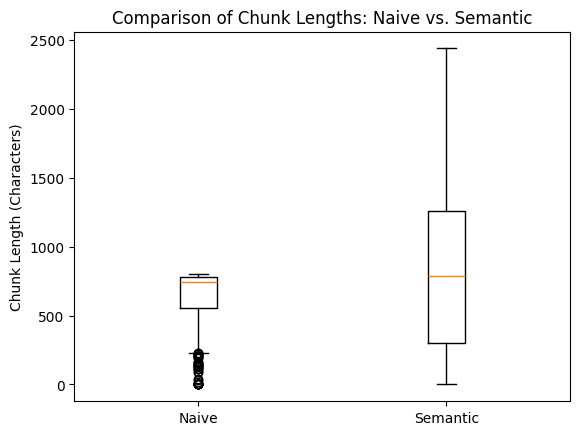

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'naive_chunks' and 'semantic_chunks' are already defined

# Get the lengths of naive and semantic chunks
naive_chunk_lengths = [len(nc.page_content) for nc in naive_chunks]
semantic_chunk_lengths = [len(sc.page_content) for sc in semantic_chunks]

# Create a box plot
plt.boxplot([naive_chunk_lengths, semantic_chunk_lengths], labels=['Naive', 'Semantic'])
plt.ylabel("Chunk Length (Characters)")
plt.title("Comparison of Chunk Lengths: Naive vs. Semantic")
plt.show()

**To simplify i will plot a bar graph to compare the average chunk length**

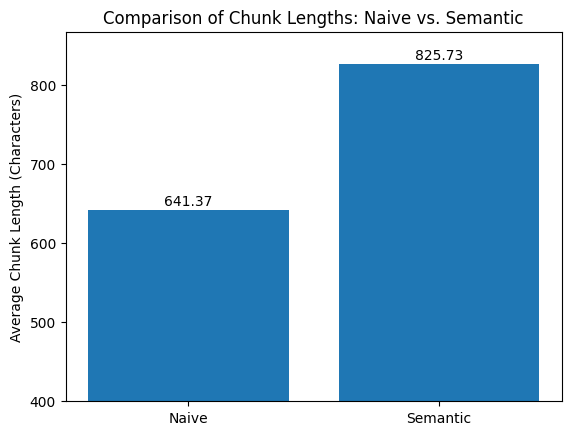

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
naive_chunk_lengths = [len(nc.page_content) for nc in naive_chunks]
semantic_chunk_lengths = [len(sc.page_content) for sc in semantic_chunks]
naive_avg = np.mean(naive_chunk_lengths)
semantic_avg = np.mean(semantic_chunk_lengths)
labels = ['Naive', 'Semantic']
values = [naive_avg, semantic_avg]
bars = plt.bar(labels, values)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 3, round(yval, 2), ha='center', va='bottom')
plt.ylabel("Average Chunk Length (Characters)")
plt.title("Comparison of Chunk Lengths: Naive vs. Semantic")
plt.ylim(bottom=400)
plt.show()

**Bar graph to compare the chunks that contain the term 'angina pectoris'**

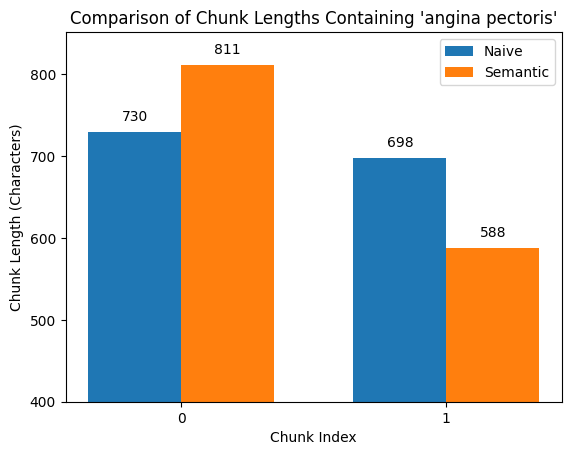

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

naive_angina_lengths = []
semantic_angina_lengths = []
for chunk in naive_chunks:
    if "angina pectoris" in chunk.page_content:
        naive_angina_lengths.append(len(chunk.page_content))
for chunk in semantic_chunks:
    if "angina pectoris" in chunk.page_content:
        semantic_angina_lengths.append(len(chunk.page_content))
bar_width = 0.35
x_pos = np.arange(len(naive_angina_lengths))

# Create the bars
bars1 = plt.bar(x_pos, naive_angina_lengths, width=bar_width, label='Naive')
bars2 = plt.bar(x_pos + bar_width, semantic_angina_lengths, width=bar_width, label='Semantic')

# Add the value on top of each bar
for bar in bars1 + bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 10,  # Adjust the '10' for vertical spacing
             f'{height:.0f}', ha='center', va='bottom')

plt.xlabel("Chunk Index")
plt.ylabel("Chunk Length (Characters)")
plt.title("Comparison of Chunk Lengths Containing 'angina pectoris'")
plt.xticks(x_pos + bar_width / 2, range(len(naive_angina_lengths)))
plt.legend()
plt.ylim(bottom=400)
plt.show()

**Bar graph to compare average chunk length containing the term 'angina pectoris'**

Average Naive Chunk Size: 714.0
Average Semantic Chunk Size: 699.5


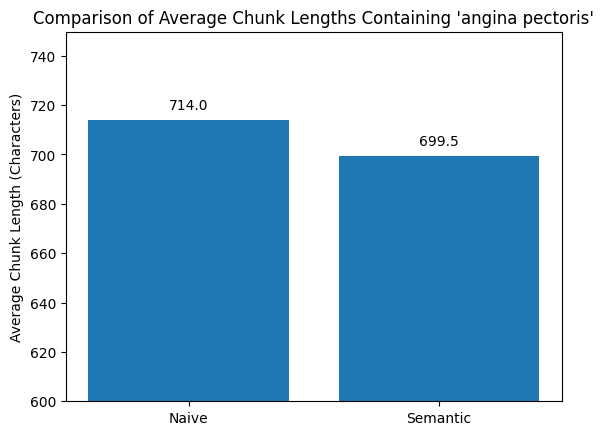

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store lengths
naive_angina_lengths = []
semantic_angina_lengths = []

# Collect lengths for naive chunks
for chunk in naive_chunks:
    if "angina pectoris" in chunk.page_content:
        naive_angina_lengths.append(len(chunk.page_content))

# Collect lengths for semantic chunks
for chunk in semantic_chunks:
    if "angina pectoris" in chunk.page_content:
        semantic_angina_lengths.append(len(chunk.page_content))

# Calculate average chunk sizes
avg_naive_length = np.mean(naive_angina_lengths)
avg_semantic_length = np.mean(semantic_angina_lengths)

# Print the average chunk sizes
print("Average Naive Chunk Size:", avg_naive_length)
print("Average Semantic Chunk Size:", avg_semantic_length)

# Create bar chart for comparison
labels = ['Naive', 'Semantic']
values = [avg_naive_length, avg_semantic_length]

# Create bars and store them in the 'bars' variable
bars = plt.bar(labels, values)

# Add the value on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 3, round(yval, 2), ha='center', va='bottom')

plt.ylabel("Average Chunk Length (Characters)")
plt.title("Comparison of Average Chunk Lengths Containing 'angina pectoris'")
plt.ylim(bottom=600)
plt.show()

**Crearting 2 vectorstores and retrievers using naive and semantic chunks**

In [ ]:
from langchain.vectorstores import Chroma
semantic_vectorstore = Chroma.from_documents(documents=semantic_chunks, embedding=embeddings)

In [ ]:
naive_vectorstore = Chroma.from_documents(documents=naive_chunks, embedding=embeddings)

**Two Dense Retrievers created**

In [ ]:
semantic_retriever = semantic_vectorstore.as_retriever(search_kwargs={"k" : 3})
naive_retriever = naive_vectorstore.as_retriever(search_kwargs={"k" : 3})

**Loading the LLM Gemma2 for RAG chain**

In [ ]:
from langchain_groq import ChatGroq

groqllm=ChatGroq(groq_api_key=groq_api_key,model_name="Gemma2-9b-It")
groqllm

**Prompt Template for the LLM to answer query based on retrieved context**

In [ ]:
from langchain_core.prompts import PromptTemplate
gqtemplate = """Answer the question :
{question}
Based on the following context :
{context}

"""
gqprompt = PromptTemplate(
    template=gqtemplate,
    input_variables=["context", "question"],

)

In [ ]:
from langchain_core.output_parsers import StrOutputParser       # to output as string

**Creating RAG chain**

In [ ]:
groqchain = gqprompt | groqllm | StrOutputParser()

**Functions to invoke RAG chain based on naive and semantic retrievers**

In [ ]:
def naive_chain(question):
  context = naive_retriever.get_relevant_documents(question)
  result = groqchain.invoke({"context": context, "question": question})
  return result,context

In [ ]:
def semantic_chain(question):
  context = semantic_retriever.get_relevant_documents(question)
  result = groqchain.invoke({"context": context, "question": question})
  return result,context

In [ ]:
result1 = naive_chain("What is agnia pectoris?")

<ipython-input-28-003bc9e7ba2d>:2: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  context = naive_retriever.get_relevant_documents(question)


In [ ]:
result1[0]

'Based on the provided text, angina pectoris is a familiar pain described by William Heberden in 1768. \n\nIt\'s a condition linked to the "hardening" of the arteries (coronary artery disease), as recognized by Edward Jenner and Caleb Parry. \n'

**The retrieved context from naive retriever is 730 characters long**

In [ ]:
len(result1[1][0].page_content)

730

**The retrieved context from semantic retriever is 811 characters long**

In [ ]:
len(result1[1][1].page_content)

811

In [ ]:
result1[1]

[Document(metadata={'page': 57, 'source': '/content/drive/MyDrive/VectorSave/cardiology/cardiology-explained.pdf'}, page_content='A common presentation in general practice is chest pain accompanied by an atypical\nhistory. In such cases, it is essential that the history is accurately established and\ndocumented. The most common noncardiac cause is dyspepsia. Although chest\npain following a big meal could have a cardiac, gastroesophageal, or biliary origin,\npain resulting from exercise is rarely biliary. It may be difficult to differentiate\nesophageal spasm from cardiac pain as they are both improved by nitrate.\nOther noncardiac causes to consider are musculoskeletal, pericardial, and pleural. \nANGINA PECTORIS\nWilliam Heberden defined angina pectoris in 1768 and provided a clear\ndescription of the familiar pain. However, it was Edward Jenner and Caleb'),
 Document(metadata={}, page_content='In such cases, it is essential that the history is accurately established and\ndocumented.

In [ ]:
result2 = semantic_chain("What is agnia pectoris?")

In [ ]:
import textwrap
from textwrap import fill

In [ ]:
formatted_answer = fill(result2[0], width=70)

In [ ]:
print(formatted_answer)

Angina pectoris is a type of chest pain that was first clearly
described by William Heberden in 1768. It is linked to the "hardening"
of the arteries,  which is now known as coronary artery disease.


In [ ]:
print(fill(result1[0], width=70))

Based on the provided text, angina pectoris is a familiar pain
described by William Heberden in 1768.   It's a condition linked to
the "hardening" of the arteries (coronary artery disease), as
recognized by Edward Jenner and Caleb Parry.


**Comparing the generated results**

In [ ]:
result3 = semantic_chain("What is the main cause of agnia pectoris?")
result4 = naive_chain("What is the main cause of agnia pectoris?")

In [ ]:
print(fill(result3[0], width=70))

According to the text provided, the main cause of angina pectoris is
**coronary artery disease**.   This is stated in the phrase:
"However, it was Edward Jenner and Caleb Parry who linked this
“disorder of the breast ” with the “hardening” of the arteries that
had been described by Giovanni Morgagni 7 years earlier. Coronary
artery disease".    Let me know if you have any other questions.


In [ ]:
print(fill(result4[0], width=70))

According to the provided text, the main cause of angina pectoris is
**coronary artery disease**.   This is stated in the passage:
"William Heberden defined angina pectoris in 1768 and provided a clear
description of the familiar pain. However, it was Edward Jenner and
Caleb Parry who linked this “disorder of the breast ” with the
“hardening” of the arteries that had been described by Giovanni
Morgagni 7 years earlier. **Coronary artery disease**"    Let me know
if you have any other questions.


**The Results are identical. It can be due to no addtional relevant context in the semtnaitc chunk retrieved.**

**Lets examine the chunks retrieved by both**

In [ ]:
for i in range(len(result3[1])):
  print("Length of Retrieved Chunk is: ",len(result3[1][i].page_content),"\n")
  print(fill(result3[1][i].page_content, width=70),"\n")

Length of Retrieved Chunk is:  811 

In such cases, it is essential that the history is accurately
established and documented. The most common noncardiac cause is
dyspepsia. Although chest pain following a big meal could have a
cardiac, gastroesophageal, or biliary origin, pain resulting from
exercise is rarely biliary. It may be difficult to differentiate
esophageal spasm from cardiac pain as they are both improved by
nitrate. Other noncardiac causes to consider are musculoskeletal,
pericardial, and pleural. ANGINA PECTORIS William Heberden defined
angina pectoris in 1768 and provided a clear description of the
familiar pain. However, it was Edward Jenner and Caleb Parry who
linked this “disorder of the breast ” with the “hardening” of the
arteries that had been described by Giovanni Morgagni 7 years earlier.
Coronary artery disease 47 

Length of Retrieved Chunk is:  730 

A common presentation in general practice is chest pain accompanied by
an atypical history. In such cases, it is

In [ ]:
for i in range(len(result4[1])):
  print("Length of Retrieved Chunk is: ",len(result4[1][i].page_content),"\n")
  print(fill(result4[1][i].page_content, width=70),"\n")

Length of Retrieved Chunk is:  811 

In such cases, it is essential that the history is accurately
established and documented. The most common noncardiac cause is
dyspepsia. Although chest pain following a big meal could have a
cardiac, gastroesophageal, or biliary origin, pain resulting from
exercise is rarely biliary. It may be difficult to differentiate
esophageal spasm from cardiac pain as they are both improved by
nitrate. Other noncardiac causes to consider are musculoskeletal,
pericardial, and pleural. ANGINA PECTORIS William Heberden defined
angina pectoris in 1768 and provided a clear description of the
familiar pain. However, it was Edward Jenner and Caleb Parry who
linked this “disorder of the breast ” with the “hardening” of the
arteries that had been described by Giovanni Morgagni 7 years earlier.
Coronary artery disease 47 

Length of Retrieved Chunk is:  730 

A common presentation in general practice is chest pain accompanied by
an atypical history. In such cases, it is

**The retrieved context is identical. Even if the chunk sizes differe while creation; Upon retrieval the context is identical when asked a query.**



---



**Lets try a different dataset. Loadinf wikipedia for articles**

In [ ]:
pip install wikipedia

**Using WikipediaLoader to load 5 documents related to 'Friedrich Nietzsche'**

In [ ]:
from langchain.document_loaders import WikipediaLoader
wiki_loader = WikipediaLoader(query='Friedrich Nietzsche', load_max_docs=5)
wiki_data = wiki_loader.load()

In [ ]:
wiki_data

[Document(metadata={'title': 'Friedrich Nietzsche', 'summary': 'Friedrich Wilhelm Nietzsche (15 October 1844 – 25 August 1900) was a German classical scholar, philosopher, and critic of culture, who became one of the most influential of all modern thinkers. He began his career as a classical philologist before turning to philosophy. In 1869 at the age of 24, he became the youngest person to hold the Chair of Classical Philology at the University of Basel in Switzerland. In 1879 he resigned due to health problems that plagued him most of his life, after which he completed much of his core writing in the following decade. In 1889 at age 44, he suffered a collapse and afterward a complete loss of his mental faculties, with paralysis and probably vascular dementia. He lived his remaining years in the care of his mother until her death in 1897, and then with his sister Elisabeth Förster-Nietzsche. Nietzsche died in 1900, after experiencing pneumonia and multiple strokes.\nNietzsche\'s work 

**Creating Naive and Semantic chunks for the documents**

In [ ]:
wiki_naive_chunks = splitter.split_documents(wiki_data)

In [ ]:
wiki_semantic_chunks = semantic_chunker.create_documents([d.page_content for d in wiki_data])

In [ ]:
type(wiki_semantic_chunks)

list

In [ ]:
type(wiki_naive_chunks)

list

**43 chunks are created using naive_chunks**

In [ ]:
len(wiki_naive_chunks)

43

**Only 12 chunks are created using semantic chunks. The average size of semantic chunk will be almost 3.5x times that of a naive chunk**

In [ ]:
len(wiki_semantic_chunks)

12

In [ ]:
import textwrap

for nc in wiki_naive_chunks:
    print("Length of chunk:", len(nc.page_content))
    print("Content:\n", textwrap.fill(nc.page_content, width=100), "\n\n")

**Lets plot a histogram to observe chunk length distribution of naive chunks**

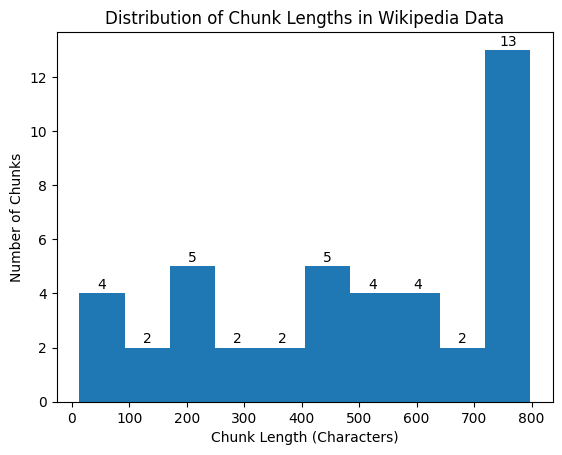

In [ ]:
import matplotlib.pyplot as plt
import textwrap
import numpy as np

chunk_lengths = [len(nc.page_content) for nc in wiki_naive_chunks]

# Create the histogram
counts, bins, patches = plt.hist(chunk_lengths, bins=10)

# Add values on top of bars
bin_centers = 0.5 * (bins[:-1] + bins[1:])  # Calculate bin centers
for count, x in zip(counts, bin_centers):
    plt.text(x, count+0.05, str(int(count)), ha='center', va='bottom')

plt.xlabel("Chunk Length (Characters)")
plt.ylabel("Number of Chunks")
plt.title("Distribution of Chunk Lengths in Wikipedia Data")
plt.show()

**Chunk sizes and content of semantic chunks**

In [ ]:
for sc in wiki_semantic_chunks:
    print("Length of chunk:", len(sc.page_content))
    print("Content:\n",textwrap.fill(sc.page_content, width=100),"\n\n")

**Plotting a histogram to observe the chunk length distribution of semantic chunks**

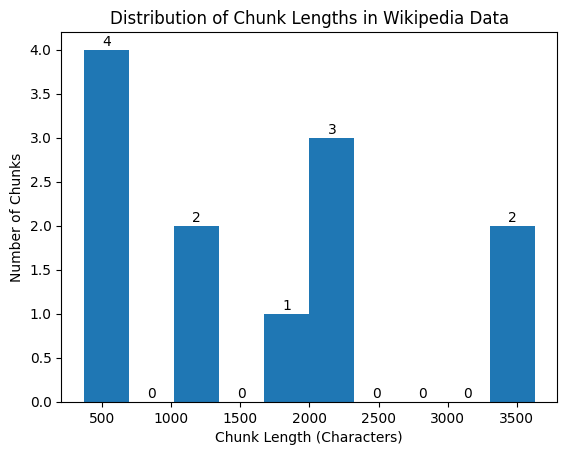

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

chunk_lengths = [len(sc.page_content) for sc in wiki_semantic_chunks]

# Create the histogram and get bar information
counts, bins, patches = plt.hist(chunk_lengths, bins=10)

# Add values on top of bars
bin_centers = 0.5 * (bins[:-1] + bins[1:])  # Calculate bin centers
for count, x in zip(counts, bin_centers):
    plt.text(x, count + 0.01, str(int(count)), ha='center', va='bottom')

plt.xlabel("Chunk Length (Characters)")
plt.ylabel("Number of Chunks")
plt.title("Distribution of Chunk Lengths in Wikipedia Data")
plt.show()

**Comparison of both approaches**

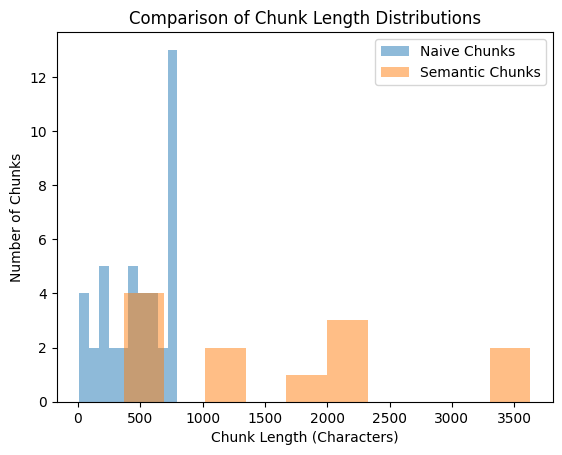

In [ ]:
import matplotlib.pyplot as plt

naive_chunk_lengths = [len(nc.page_content) for nc in wiki_naive_chunks]
semantic_chunk_lengths = [len(sc.page_content) for sc in wiki_semantic_chunks]

plt.hist(naive_chunk_lengths, bins=10, alpha=0.5, label='Naive Chunks')
plt.hist(semantic_chunk_lengths, bins=10, alpha=0.5, label='Semantic Chunks')
plt.xlabel("Chunk Length (Characters)")
plt.ylabel("Number of Chunks")
plt.title("Comparison of Chunk Length Distributions")
plt.legend()
plt.show()

**Box Plot to compare both naive and semantic chunks**

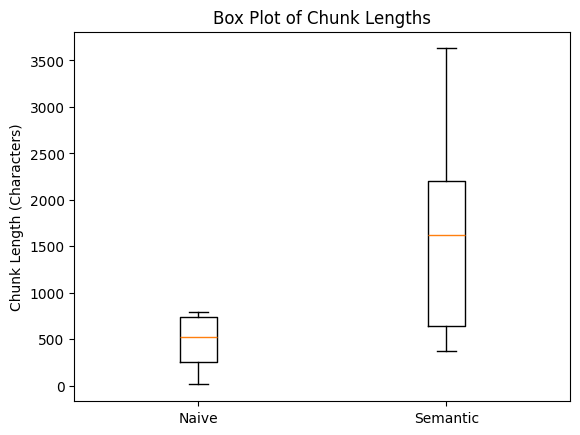

In [ ]:
import matplotlib.pyplot as plt

naive_chunk_lengths = [len(nc.page_content) for nc in wiki_naive_chunks]
semantic_chunk_lengths = [len(sc.page_content) for sc in wiki_semantic_chunks]

plt.boxplot([naive_chunk_lengths, semantic_chunk_lengths], labels=['Naive', 'Semantic'])
plt.ylabel("Chunk Length (Characters)")
plt.title("Box Plot of Chunk Lengths")
plt.show()

**Bar Graph to compare average chunk size of naive and semantic chunks**

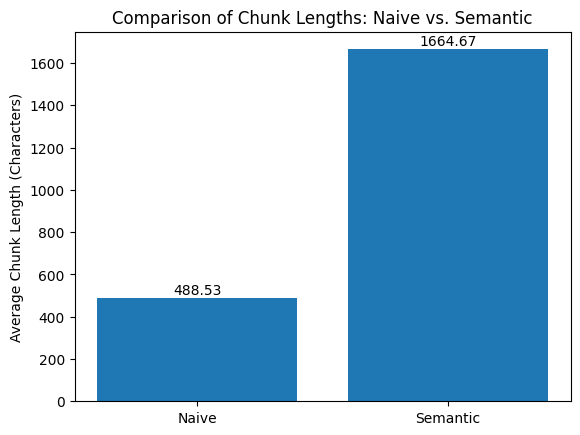

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

naive_chunk_lengths = [len(nc.page_content) for nc in wiki_naive_chunks]
semantic_chunk_lengths = [len(sc.page_content) for sc in wiki_semantic_chunks]

naive_avg = np.mean(naive_chunk_lengths)
semantic_avg = np.mean(semantic_chunk_lengths)

labels = ['Naive', 'Semantic']
values = [naive_avg, semantic_avg]

bars = plt.bar(labels, values)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 3, round(yval, 2), ha='center', va='bottom')
plt.ylabel("Average Chunk Length (Characters)")
plt.title("Comparison of Chunk Lengths: Naive vs. Semantic")
plt.show()

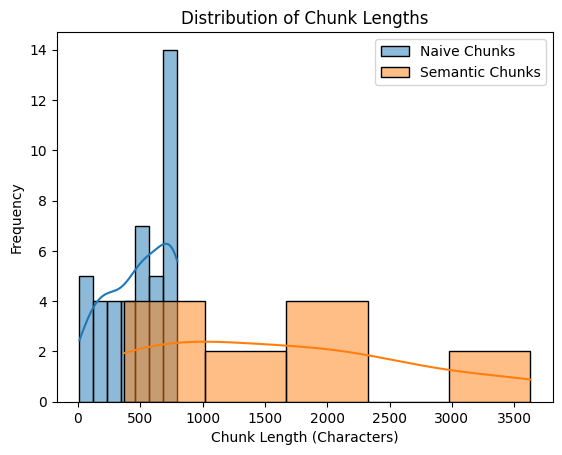

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(naive_chunk_lengths, label='Naive Chunks', kde=True)
sns.histplot(semantic_chunk_lengths, label='Semantic Chunks', kde=True)
plt.xlabel("Chunk Length (Characters)")
plt.ylabel("Frequency")
plt.title("Distribution of Chunk Lengths")
plt.legend()
plt.show()

**Creating 2 Vectorstore and their respective retrievers based on dense vectors**

In [ ]:
wiki_naive_vectorstore = Chroma.from_documents(documents=wiki_naive_chunks, embedding=embeddings)
wiki_semantic_vectorstore = Chroma.from_documents(documents=wiki_semantic_chunks, embedding=embeddings)

In [ ]:
wiki_naive_retriever = wiki_naive_vectorstore.as_retriever(search_kwargs={"k" : 3})
wiki_semantic_retriever = wiki_semantic_vectorstore.as_retriever(search_kwargs={"k" : 3})

**Creating RAG chain for both retrievers**

In [ ]:
def wiki_naive_chain(question):
  context = wiki_naive_retriever.get_relevant_documents(question)
  result = groqchain.invoke({"context": context, "question": question})
  return result,context

In [ ]:
def wiki_semantic_chain(question):
  context = wiki_semantic_retriever.get_relevant_documents(question)
  result = groqchain.invoke({"context": context, "question": question})
  return result,context

**Observing the response of both RAG chains**

In [ ]:
wiki_res1 = wiki_naive_chain("Which works inspired nietzsche?")
wiki_res2 = wiki_semantic_chain("Which works inspired nietzsche?")

In [ ]:
print(fill(wiki_res1[0], width=70))

According to the provided text, Nietzsche drew inspiration from a
variety of sources, including:  * **Greek Tragedy:** This is mentioned
as a specific source of inspiration. * **Zoroaster:**  The ancient
Persian prophet is named as an influence. * **Arthur Schopenhauer:**
The 19th-century German philosopher is cited as a figure whose
pessimism Nietzsche sought to overcome. * **Ralph Waldo Emerson:** The
American essayist and philosopher is listed among Nietzsche's
inspirations. * **Richard Wagner:** The German composer is mentioned
as an influence. * **Fyodor Dostoevsky:** The Russian novelist is
named as an inspiration. * **Johann Wolfgang von Goethe:** The German
poet, playwright, and novelist is listed as an influence.    Let me
know if you'd like more details about any of these influences.


In [ ]:
print(fill(wiki_res2[0], width=70))

According to the provided text, Nietzsche drew inspiration from:  *
**Greek tragedy** * **Zoroaster** * **Arthur Schopenhauer** * **Ralph
Waldo Emerson** * **Richard Wagner** * **Fyodor Dostoevsky** *
**Johann Wolfgang von Goethe**    Let me know if you have any other
questions.


**The results are similar based on the names provided. There is added detail in the first result which are naive chunks.**



---




**Lets observe the retrieved context from both approaches**

In [ ]:
wiki_res1[1][1].page_content

'Nietzsche\'s work spans philosophical polemics, poetry, cultural criticism, and fiction while displaying a fondness for aphorism and irony. Prominent elements of his philosophy include his radical critique of truth in favour of perspectivism; a genealogical critique of religion and Christian morality and a related theory of master–slave morality; the aesthetic affirmation of life in response to both the "death of God" and the profound crisis of nihilism; the notion of Apollonian and Dionysian forces; and a characterisation of the human subject as the expression of competing wills, collectively understood as the will to power. He also developed influential concepts such as the Übermensch and his doctrine of eternal return. In his later work, he became increasingly preoccupied with the'

In [ ]:
for i in range(len(wiki_res1[1])):
  print("Length of Retrieved Chunk is: ",len(wiki_res1[1][i].page_content),"\n")
  print(fill(wiki_res1[1][i].page_content, width=70),"\n")

Length of Retrieved Chunk is:  100 

This is a list of writings and other compositions by Friedrich
Nietzsche.   == Works by Nietzsche == 

Length of Retrieved Chunk is:  793 

Nietzsche's work spans philosophical polemics, poetry, cultural
criticism, and fiction while displaying a fondness for aphorism and
irony. Prominent elements of his philosophy include his radical
critique of truth in favour of perspectivism; a genealogical critique
of religion and Christian morality and a related theory of
master–slave morality; the aesthetic affirmation of life in response
to both the "death of God" and the profound crisis of nihilism; the
notion of Apollonian and Dionysian forces; and a characterisation of
the human subject as the expression of competing wills, collectively
understood as the will to power. He also developed influential
concepts such as the Übermensch and his doctrine of eternal return. In
his later work, he became increasingly preoccupied with the 

Length of Retrieved Chunk i

In [ ]:
for i in range(len(wiki_res2[1])):
  print("Length of Retrieved Chunk is: ",len(wiki_res2[1][i].page_content),"\n")
  print(fill(wiki_res2[1][i].page_content, width=70),"\n")

Length of Retrieved Chunk is:  100 

This is a list of writings and other compositions by Friedrich
Nietzsche.   == Works by Nietzsche == 

Length of Retrieved Chunk is:  793 

Nietzsche's work spans philosophical polemics, poetry, cultural
criticism, and fiction while displaying a fondness for aphorism and
irony. Prominent elements of his philosophy include his radical
critique of truth in favour of perspectivism; a genealogical critique
of religion and Christian morality and a related theory of
master–slave morality; the aesthetic affirmation of life in response
to both the "death of God" and the profound crisis of nihilism; the
notion of Apollonian and Dionysian forces; and a characterisation of
the human subject as the expression of competing wills, collectively
understood as the will to power. He also developed influential
concepts such as the Übermensch and his doctrine of eternal return. In
his later work, he became increasingly preoccupied with the 

Length of Retrieved Chunk i

Both approaches retrieved identical chunks. Even though semantic chunking is good at grouping sentences with similar context together and then forming a long comprehensive chunk; the end result does not improve over naive chunking methods.
This is primarily due to cosine similarity function used twice. Chunks in semantic chunking are created using cosine-similarity threshold which is similar to what a retriever does where we apply cosine similarity to the vectors. The process is not going to improve results applied once twice or thrice. Semantic chunking can hence help is data cleaning processes but is computationally expensive and does not provide improvements in retrieval process. Semantic chunking can be applied in Late-Chunking methods.